In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.files import get_roodirs

rootdir = '../save'
kf = '0'
mode = 'fine-tuning'
method = 'spm-mcmc-estw'

cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
roodirs = get_roodirs(rootdir)
model_names = [r.split('/')[-1] for r in roodirs if '~' in r] # patch
model_names

['mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0',
 'mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0',
 'mdl=ParallelTCNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0',
 'mdl=SerialTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~rsc=0',
 'mdl=SerialTCNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0',
 'mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0']

In [3]:
baselines_dict = {
    '0@val':{
        'b-accuracy':65.86,
        'b-f1score':.43,
    },
    '0@test':{
        'b-accuracy':60.38,
        'b-f1score':.45,
    },
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ids=['0', '100', '101', '102', '103'](n=5#) - model=mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0
ids=['100', '101', '102', '103'](n=4#) - model=mdl=ParallelRNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0
ids=['100', '101', '102', '103', '104', '105'](n=6#) - model=mdl=ParallelTCNN~in-dims=3~te-dims=0~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0
ids=[](n=0#) - model=mdl=SerialTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~rsc=0
ids=[](n=0#) - model=mdl=SerialTCNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~aggr=avg~rsc=0
ids=[](n=0#) - model=mdl=SerialRNN~in-dims=3~te-dims=0~enc-emb=32-32-32~dec-emb=g32-g32.r32-r32~cell=GRU~rsc=0


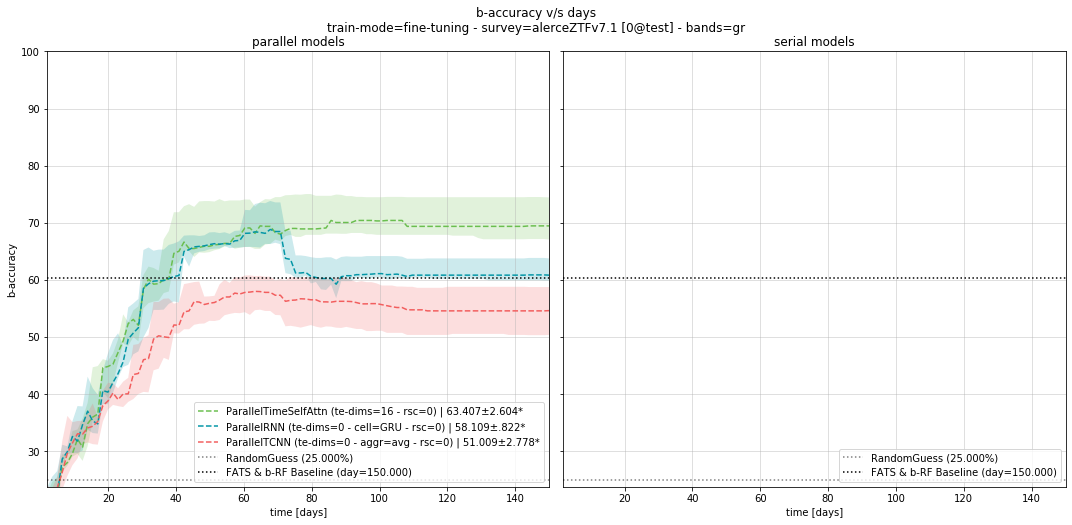

In [54]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_metric

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
lcset_name = 'test'
metric_name = 'b-accuracy' # accuracy f1score
kwargs = {
    'label_keys':label_keys,
    'baselines_dict':baselines_dict,
}
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, metric_name, **kwargs)

In [64]:
from flamingchoripan.files import load_pickle

f = '../save/mdl=ParallelTimeSelfAttn~in-dims=2~te-dims=16~enc-emb=g32-g32-g32.r32-r32-r32~dec-emb=g32-g32.r32-r32~rsc=0/pre-training/model_info/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method=spm-mcmc-estw/0@train.spm-mcmc-estw/id=0.d'
d = load_pickle(f)
d = d['monitors']['wmse-xentropy']['save_dict']['loss_df']
d

,_dt,_len,_loss,xentropy,mse
k,,,,,
0,0.134184,100,1349.870239,1.592161,1348.278076
1,0.091325,100,1044.075317,1.498029,1042.577271
2,0.102636,100,1318.536865,1.492980,1317.043823
3,0.128317,100,1228.641113,1.521197,1227.119873
4,0.127419,100,940.677002,1.563058,939.114014
5,0.098334,100,1086.226685,1.525794,1084.700806
6,0.095515,100,849.182312,1.503390,847.678894
7,0.123389,100,951.083435,1.523817,949.559570
8,0.123417,100,949.905273,1.577226,948.328003


In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_cm

label_keys = [
    'cell',
    'aggr',
    'te-dims',
    'rsc',
]
lcset_name = 'test'
kwargs = {
    'label_keys':label_keys,
    #'export_animation':True,
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_parallel_serial_df
from flamingchoripan.latex.latex_tables import LatexTable

metric_names = [
    'b-accuracy',
    'b-f1score',
    'b-gmean',
    'b-xentropy',
    ]
kwargs = {
    'day_to_metric':150,
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    }
info_df = get_parallel_serial_df(rootdir, cfilename, kf, lcset_name, model_names, metric_names, **kwargs)

latex_kwargs = {
    'caption':f'{query_key} {day_to_metric} {set_name}'.replace('_', '\\_'),
    'label':'?',
    #'bold_criteriums':'max',
    #'custom_tabular_align':'l|'+'c'*sum([m.split('-')[-1]=='fstw' for m in methods])+'|'+'c'*sum([m.split('-')[-1]=='estw' for m in methods]),
    #'custom_tabular_align':'l|cc|cc|cc',
    'hline_k':1,
}
latex_table = LatexTable(info_df, **latex_kwargs)
print(latex_table)
info_df

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.times import get_times_df

kwargs = {
    #'override_model_name':False, # False True
    'label_keys':label_keys,
    }
info_df = get_times_df(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)
info_df